In [1]:
import pickle, os
from itertools import islice
import numpy as np, scipy as sp, pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcdefaults()
if hasattr(__builtins__, '__IPYTHON__'):
    get_ipython().run_line_magic('matplotlib', 'inline')
    get_ipython().run_line_magic('config', 'InlineBackend.figure_format = "jpg"')
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
    # https://stackoverflow.com/questions/70766518/how-to-change-ipython-error-highlighting-color
    from IPython.core import ultratb
    print(ultratb.VerboseTB._tb_highlight)
    ultratb.VerboseTB._tb_highlight = "bg:#006400"

bg:ansiyellow


In [2]:
import json

In [3]:
%run util.ipynb

bg:#006400


In [4]:
with open('data_taiwan/peak.geojson', 'rt') as f:
    data = json.load(f)

In [5]:
records = [
    {
        'lat': record['geometry']['coordinates'][1], 
        'lon': record['geometry']['coordinates'][0], 
        'ele': record['properties'].get('ele', np.nan), 
        'name': record['properties'].get('name', '')}
for record in data['features']]

In [6]:
filtered_records = []
for record in records:
    try:
        record['ele'] = float(record['ele'])
        if record['name'] != '':
            filtered_records.append(record)
    except:
        print(record['ele'])


3115;3114.832
1020.00;1020
55.87;55.872
519.39;520.489
180公尺
87.501;87.50
212.175;212
126.7;126.70
;916


In [7]:
df = pd.DataFrame.from_records(filtered_records)

In [8]:
df['ele'].fillna(-1., inplace=True)

In [9]:
df.shape

(4316, 4)

In [10]:
df.dtypes

lat     float64
lon     float64
ele     float64
name     object
dtype: object

In [11]:
df.isna().sum()

lat     0
lon     0
ele     0
name    0
dtype: int64

In [12]:
df.head(100)

,lat,lon,ele,name
0,25.026679,121.575501,183.00,象山
1,24.963216,121.585684,473.45,鵝角格山
2,22.698361,120.310319,171.48,半屏山
3,26.163211,119.947609,42.00,牛背嶺
4,23.487531,120.959472,3858.00,玉山北峰
5,23.446600,120.958800,3844.00,玉山南峰
6,23.470726,120.965189,3869.00,玉山東峰
7,23.475600,120.917650,3239.00,玉山前峰
8,23.297167,121.028609,3496.00,三叉山
9,23.626815,121.091874,3619.42,東郡大山


In [13]:
df_x20y20 = pd.DataFrame.from_records(
    df[['lat', 'lon']].apply(lambda row: latlon_2_twd97(row.lat, row.lon), axis=1),
    columns=['x20', 'y20'],
)
df = pd.concat([df, df_x20y20], axis=1)
del df_x20y20

In [14]:
df['x'] = x20_2_x(df['x20']) # todo: maybe / instead of //
df['y'] = y20_2_y(df['y20']) # todo: maybe / instead of //
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df_truncated = df[df['x'].between(x_min, x_max, inclusive='left') & df['y'].between(y_min, y_max, inclusive='left')]

In [15]:
df_truncated.reset_index(drop=True, inplace=True)

In [16]:
print(df_truncated.shape)
df_truncated.head(100)

(1081, 8)


,lat,lon,ele,name,x20,y20,x,y
0,25.026679,121.575501,183.00,象山,308079.119369,2.768856e+06,3453,1242
1,24.963216,121.585684,473.45,鵝角格山,309137.156601,2.761831e+06,3506,891
2,24.993855,121.681684,562.00,天王峰,318813.622783,2.765270e+06,3990,1063
3,24.995368,121.687943,593.00,皇帝殿東峰,319444.666772,2.765441e+06,4022,1072
4,25.148433,121.543349,644.83,紗帽山,304780.088956,2.782329e+06,3289,1916
5,25.171777,121.565687,889.77,七股山,307021.364013,2.784924e+06,3401,2046
6,25.214165,121.563429,1094.00,竹子山,306774.077537,2.789618e+06,3388,2280
7,24.992558,121.548716,142.40,溪子口山,305391.274374,2.765065e+06,3319,1053
8,25.020090,121.739778,360.00,孝子山,324662.433071,2.768207e+06,4283,1210
9,25.014310,121.739394,568.00,中央尖,324627.109971,2.767566e+06,4281,1178


In [17]:
# df_truncated.to_pickle('data_taiwan/df_peak.pkl')
del df, df_truncated

In [18]:
df_peak = pd.read_pickle('data_taiwan/df_peak.pkl')

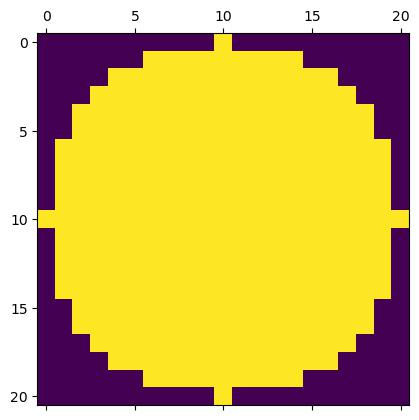

In [19]:
n = 10
mark = np.zeros((n * 2 + 1,) * 2, dtype=np.bool_)
for delta_y in range(-n, n + 1):
    for delta_x in range(-n, n + 1):
        if (delta_y ** 2 + delta_x ** 2) <= n ** 2:
            mark[n + delta_y, n + delta_x] = True
plt.matshow(mark);

In [20]:
yx_2_peakidx = np.full((y_max, x_max), -1, dtype=np.int64)
for i, (y, x) in df_peak[['y', 'x']].iterrows():
    for delta_y in range(-n, n + 1):
        for delta_x in range(-n, n + 1):
            if ((delta_y ** 2 + delta_x ** 2) <= n ** 2) and \
                (y + delta_y >= 0) and (y + delta_y < y_max) and \
                (x + delta_x >= 0) and (x + delta_x < x_max) and \
                (
                    (yx_2_peakidx[y + delta_y, x + delta_x] == -1) or 
                    (df_peak.at[i, 'ele'] > df_peak.at[yx_2_peakidx[y + delta_y, x + delta_x], 'ele'])    
                ):
                    yx_2_peakidx[y + delta_y, x + delta_x] = i


In [21]:
# np.save('data_taiwan/yx_2_peakidx.npy', yx_2_peakidx)
del yx_2_peakidx

In [22]:
yx_2_peakidx = np.load('data_taiwan/yx_2_peakidx.npy')

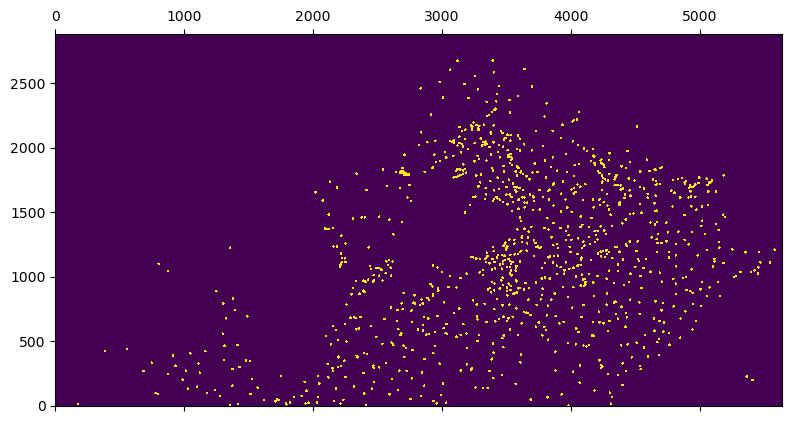

In [23]:
plt.matshow(yx_2_peakidx > 0, origin='lower');
plt.gca().set_aspect('equal');